In [1]:
import random
import os
import pandas as pd

# audio usage
import torch
import torchaudio
import librosa

# plotting 
import matplotlib.pyplot as plt

# Data

We have 6 audio files. 2 from Dementia Bank, 2 from ADReSS 2020 and 2 from ADReSS 2021. In each subdataset we have one sample from control group and one sample from dementia group. 

In [2]:
data_info = pd.read_csv('../input/samples-to-visualize/speakers_ids.csv')
data_info.head(3)

,speaker_id,label,audio_path,merged_audio_path
0,0,Dementia,C:\Users\Милана\PycharmProjects\course_work\de...,C:\Users\Милана\PycharmProjects\course_work\de...
1,1,Dementia,C:\Users\Милана\PycharmProjects\course_work\de...,C:\Users\Милана\PycharmProjects\course_work\de...
2,2,Dementia,C:\Users\Милана\PycharmProjects\course_work\de...,C:\Users\Милана\PycharmProjects\course_work\de...


In [3]:
# used datasets in the whole project
datasets_names = ['DePaul', 'Lanzi', 'Kempler', 'Holland', 'Hopkins', 'Pitt', 'WLS', 'ADReSS-IS2020-train', 'ADReSS-IS2020-test', 'ADReSSo21-diagnosis-train', 'ADReSSo21-diagnosis-test']

In [4]:
audio_files_paths = [f for f in os.listdir('../input/samples-to-visualize') if f.endswith('wav')]

# get corresponding datasets names and their labels
datasets_per_audio = [data_info[data_info['audio_path'].str.contains(f)]['audio_path'].item() for f in audio_files_paths]
datasets_per_audio = [d_name for a in datasets_per_audio for d_name in set(a.split('\\')) if d_name in datasets_names]
labels = [data_info[data_info['audio_path'].str.contains(f)]['label'].item() for f in audio_files_paths]

audio_files_paths = ['../input/samples-to-visualize/' + f for f in audio_files_paths]
print(f'Labels of corresponding audio files {labels}')
print(f'Datasets names of corresponding audio files {datasets_per_audio}')

Labels of corresponding audio files ['Dementia', 'Dementia', 'Control', 'Dementia', 'Control', 'Control']
Datasets names of corresponding audio files ['Kempler', 'ADReSS-IS2020-train', 'WLS', 'ADReSSo21-diagnosis-train', 'ADReSS-IS2020-train', 'ADReSSo21-diagnosis-train']


# Get spectrograms and plot spectrograms

In [5]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None, power_to_db=True):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    if power_to_db:
        spec = librosa.power_to_db(spec)
    im = axs.imshow(spec, origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
n_fft = 1024
hop_length = 512
center = True
n_mels = 128
n_mfcc = 32
sample_rate = 44100 

spec_transformation = torchaudio.transforms.Spectrogram(n_fft=n_fft, hop_length=hop_length, center=True)
mfcc_transformation = torchaudio.transforms.MFCC(sample_rate=sample_rate, n_mfcc=n_mfcc, melkwargs={'n_fft': n_fft, 'n_mels': n_mels, 'hop_length': hop_length, 'mel_scale': 'htk',})
melspec_transformation = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, pad_mode="reflect", power=2.0, norm='slaney', onesided=True, mel_scale="htk",)

/opt/conda/lib/python3.7/site-packages/torchaudio/functional/functional.py:508: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  "At least one mel filterbank has all zero values. "


# Plot Spectrograms

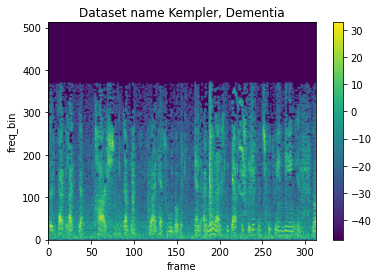

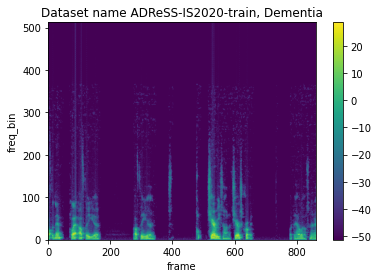

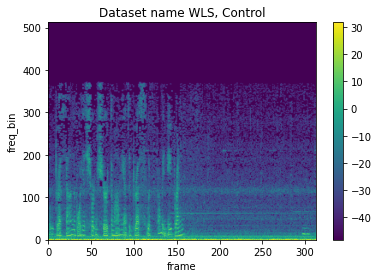

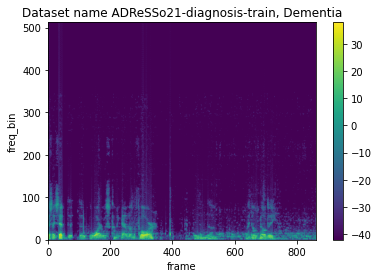

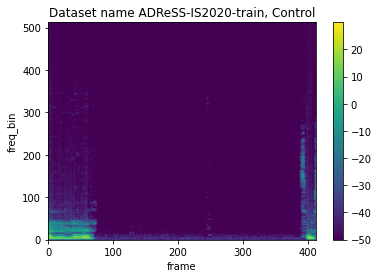

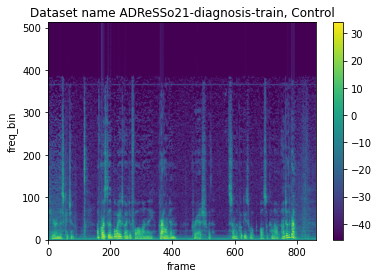

In [6]:
for audio_path, label, dataset_name in zip(audio_files_paths, labels, datasets_per_audio):
    
    audio, sr = torchaudio.load(audio_path)
    chunks = list(torch.split(audio, 10*sr, dim=-1))
    
    random_chunk = random.choice(chunks)
    
    spectrogram = spec_transformation(random_chunk)
    
    plot_spectrogram(spectrogram[0], title=f'Dataset name {dataset_name}, {label}')

# Plot Melspectrograms

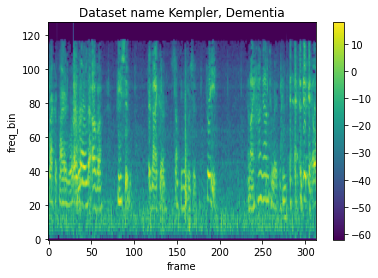

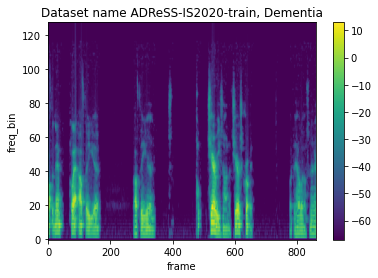

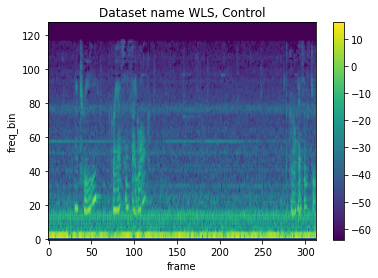

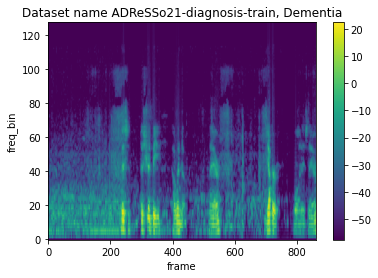

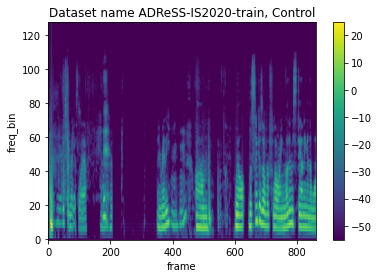

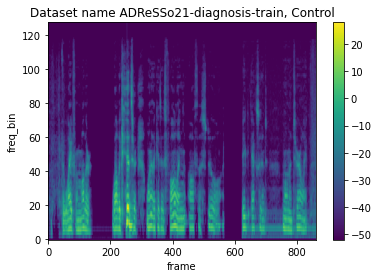

In [7]:
for audio_path, label, dataset_name in zip(audio_files_paths, labels, datasets_per_audio):
    
    audio, sr = torchaudio.load(audio_path)
    chunks = list(torch.split(audio, 10*sr, dim=-1))
    
    random_chunk = random.choice(chunks)
    
    spectrogram = melspec_transformation(random_chunk)
    
    plot_spectrogram(spectrogram[0], title=f'Dataset name {dataset_name}, {label}')

# Plot MFCC

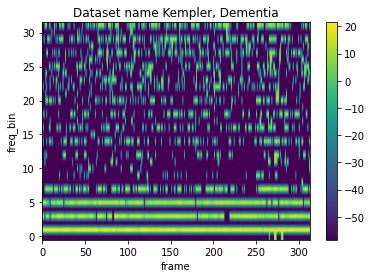

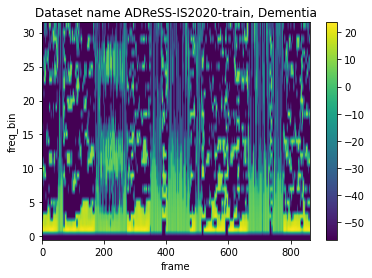

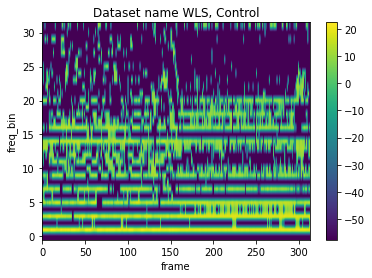

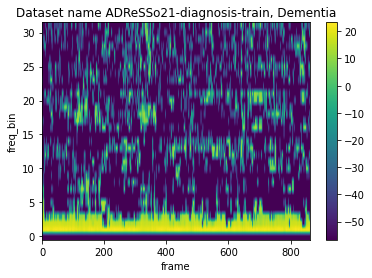

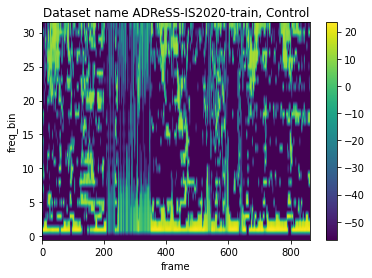

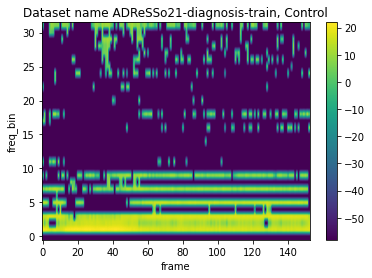

In [8]:
for audio_path, label, dataset_name in zip(audio_files_paths, labels, datasets_per_audio):
    
    audio, sr = torchaudio.load(audio_path)
    chunks = list(torch.split(audio, 10*sr, dim=-1))
    
    random_chunk = random.choice(chunks)
    
    spectrogram = mfcc_transformation(random_chunk)
    
    plot_spectrogram(spectrogram[0], title=f'Dataset name {dataset_name}, {label}')

# Plot GFCC

In [9]:
!pip install spafe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 3.1 MB/s eta 0:00:00


In [10]:
from spafe.features.gfcc import gfcc
import scipy.io.wavfile
import spafe.utils.vis as vis

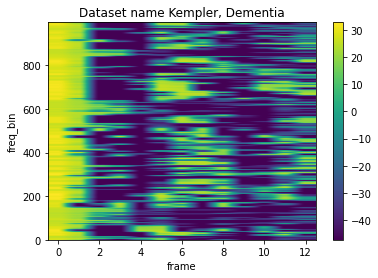

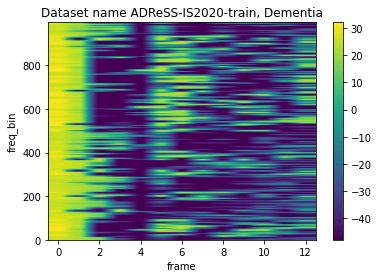

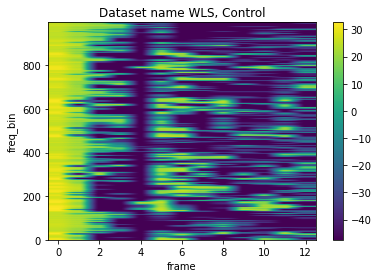

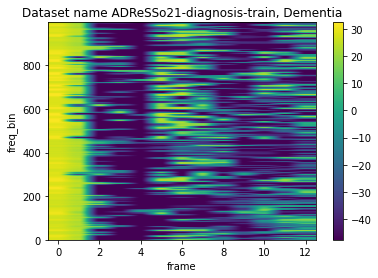

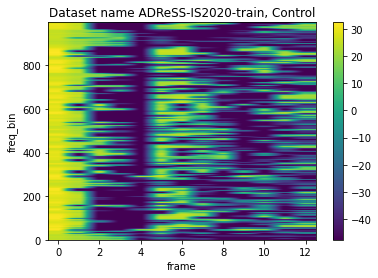

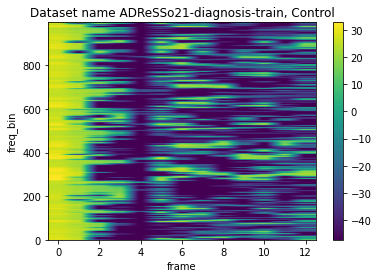

In [11]:
for audio_path, label, dataset_name in zip(audio_files_paths, labels, datasets_per_audio):
    
    fs, audio = scipy.io.wavfile.read(audio_files_paths[0])
    audio = torch.Tensor(audio)
    chunks = list(torch.split(audio, 10*fs, dim=-1))
    
    random_chunk = random.choice(chunks)
    
    spectrogram = gfcc(random_chunk)
    
    plot_spectrogram(spectrogram, title=f'Dataset name {dataset_name}, {label}')